<a href="https://colab.research.google.com/github/Halskii/Machine-Learning/blob/main/CAP4611_Assignment_4_James_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Uploading the datasets**

For this notebook to run you must first upload the training and testing CSV files into the google collab session.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving test.csv to test.csv
Saving train.csv to train.csv
User uploaded file "test.csv" with length 681759 bytes
User uploaded file "train.csv" with length 773104 bytes


# **Importing the training and test datasets**

This section converts the uploaded CSV files into pandas dataframes via the read_csv function.

In [ ]:
import pandas as pd
import numpy as np
import io

raw_train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
train_data = raw_train_data.sample(frac=1).reset_index(drop=True)
train_data.head()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10320 non-null  int64  
 1   longitude           10320 non-null  float64
 2   latitude            10320 non-null  float64
 3   housing_median_age  10320 non-null  float64
 4   total_rooms         10320 non-null  float64
 5   total_bedrooms      10210 non-null  float64
 6   population          10320 non-null  float64
 7   households          10320 non-null  float64
 8   median_income       10320 non-null  float64
 9   ocean_proximity     10320 non-null  object 
 10  median_house_value  10320 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 887.0+ KB


In [ ]:
raw_test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_data = raw_test_data.sample(frac=1).reset_index(drop=True)
test_data.head()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10320 non-null  int64  
 1   longitude           10320 non-null  float64
 2   latitude            10320 non-null  float64
 3   housing_median_age  10320 non-null  float64
 4   total_rooms         10320 non-null  float64
 5   total_bedrooms      10223 non-null  float64
 6   population          10320 non-null  float64
 7   households          10320 non-null  float64
 8   median_income       10320 non-null  float64
 9   ocean_proximity     10320 non-null  object 
dtypes: float64(8), int64(1), object(1)
memory usage: 806.4+ KB


# **Replacing our categorical values with numeric ones.**

Since we have a combination of continuous and categorical features, let's convert our categorical feature, 'ocean_proximity', into integer represenations.

We convert ocean proximity to categorys, and convert those to integer representations.


In [ ]:
train_data['ocean_proximity'] = train_data['ocean_proximity'].astype('category')
train_data['ocean_proximity'] = train_data['ocean_proximity'].cat.codes + 1

train_data['ocean_proximity']

0        4
1        2
2        1
3        2
4        1
        ..
10315    4
10316    2
10317    2
10318    4
10319    2
Name: ocean_proximity, Length: 10320, dtype: int8

In [ ]:
test_data['ocean_proximity'] = test_data['ocean_proximity'].astype('category')
test_data['ocean_proximity'] = test_data['ocean_proximity'].cat.codes + 1

test_data['ocean_proximity']

0        2
1        2
2        1
3        2
4        1
        ..
10315    1
10316    1
10317    2
10318    4
10319    2
Name: ocean_proximity, Length: 10320, dtype: int8

# **Analysis of our data**

Contained in this section are a series of visual tools for getting a feel for our data. Through our heatmap we can see the correlation of our datasets different features. Heatmaps are good as a visual, but for this dataset it's a bit hard to determine which features are the most applicable from a visual perspective. There are some features that should have the most impact on the median home value in a given area, and there are others that may not have as big a impact.


In [ ]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10320.0,5159.500000,2979.271723,0.0000,2579.7500,5159.500,7739.250000,10319.0000
longitude,10320.0,-119.593791,2.005209,-124.3500,-121.8100,-118.535,-118.010000,-114.5500
latitude,10320.0,35.647997,2.132319,32.5400,33.9400,34.270,37.720000,41.9200
housing_median_age,10320.0,28.544477,12.605356,1.0000,18.0000,29.000,37.000000,52.0000
total_rooms,10320.0,2652.874031,2215.969393,6.0000,1461.0000,2138.000,3144.250000,39320.0000
total_bedrooms,10210.0,541.297845,427.866565,2.0000,294.2500,438.000,648.750000,6445.0000
population,10320.0,1431.618120,1144.035957,8.0000,786.0000,1165.000,1724.000000,28566.0000
households,10320.0,502.993605,388.016806,2.0000,278.0000,413.000,607.000000,6082.0000
median_income,10320.0,3.882051,1.902330,0.4999,2.5833,3.550,4.733575,15.0001
ocean_proximity,10320.0,2.171802,1.423992,1.0000,1.0000,2.000,2.000000,5.0000


**Distribution of the Data**

Here we show some bar plots for our features to get a feel for the distribution of the data.


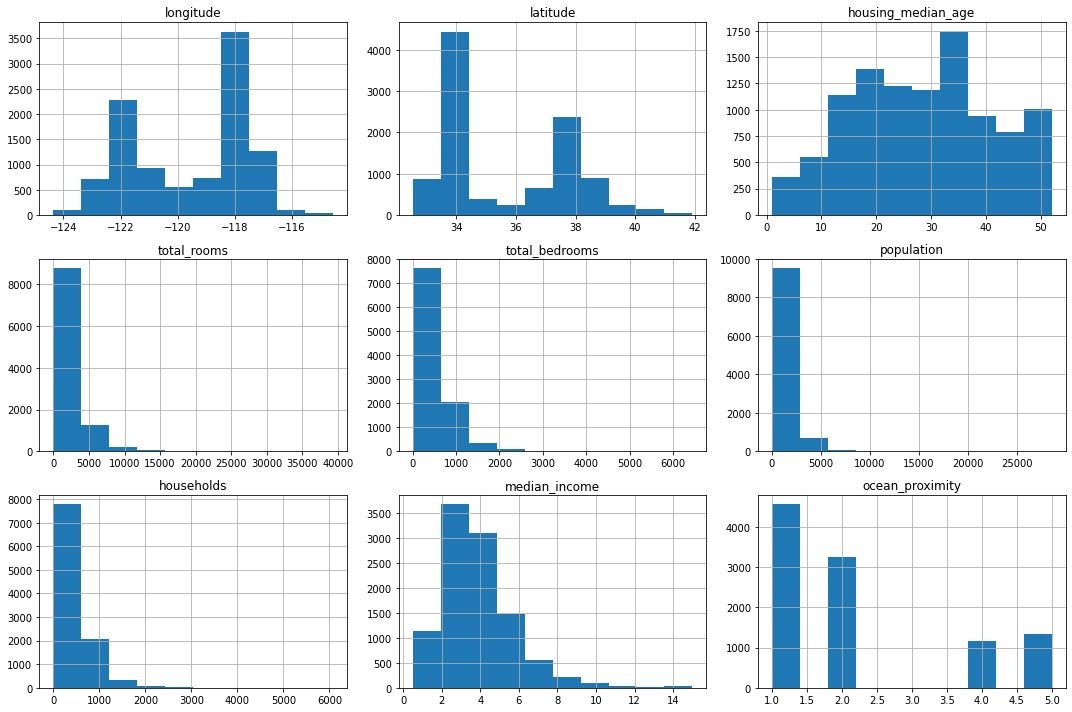

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

td = train_data.drop(['id', 'median_house_value'], axis=1)
td.hist(figsize=(15, 10))
plt.tight_layout()

**Heatmap of the Data**

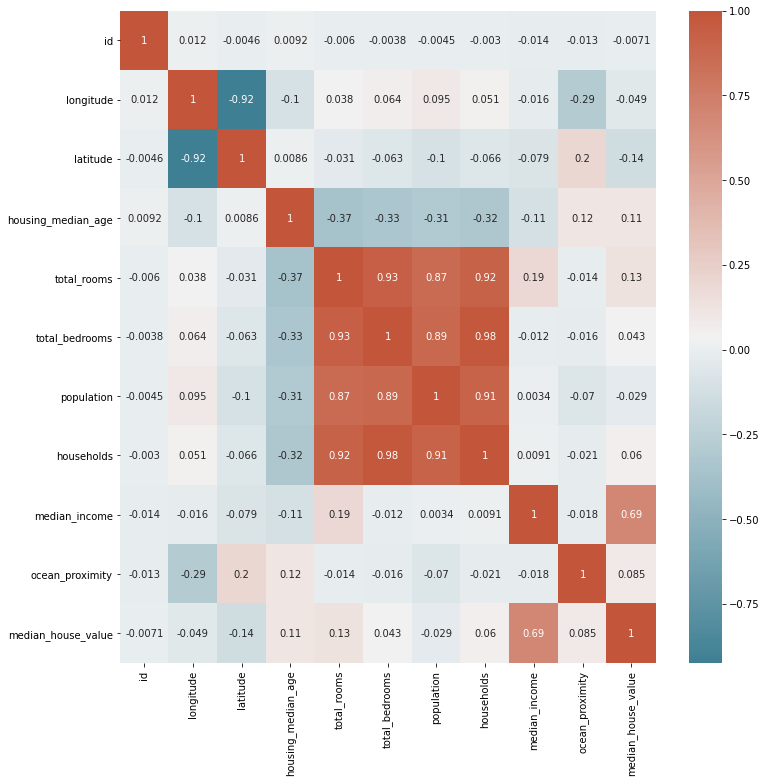

In [ ]:
corr = train_data.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

# **Checking for NaN values in the training data**

In this cell we check whether NaN values exist in the data.

In [ ]:
# Checks and reports NaNs in the training data.
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
total_bedrooms,110,0.010659
median_house_value,0,0.000000
ocean_proximity,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000
total_rooms,0,0.000000
housing_median_age,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [ ]:
# Checks and reports NaNs in the test data.
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
total_bedrooms,97,0.009399
ocean_proximity,0,0.000000
median_income,0,0.000000
households,0,0.000000
population,0,0.000000
total_rooms,0,0.000000
housing_median_age,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
id,0,0.000000


**Here we could replace NaN values, but I chose to let my pipeline handle it using a SimpleImputer object later on.**



In [ ]:
# Replace NaNs in the training data.
#mean_value=train_data['total_bedrooms'].mean()
#train_data['total_bedrooms']=train_data['total_bedrooms'].fillna(mean_value)

# Replace NaNs in the test data.
#mean_value=test_data['total_bedrooms'].mean()
#test_data['total_bedrooms']=test_data['total_bedrooms'].fillna(mean_value)

# **Outliers**

To get a grasp of how many outliers are in each feature, here we use interquartile ranges to determine which values are outliers using 25% as our lower bound, and 75% as our upper bound.


**I chose to ignore these outliers as they were essential to the models performance.**

In [ ]:
higherQ = .75
lowerQ =.25

quantiles = train_data.iloc[:, :].quantile([lowerQ, higherQ]).transpose()

# Calculates thresholds for deeming values as outliers and stores them into a pandas dataframe.
outliers = pd.DataFrame({'Lower Threshold' : quantiles[lowerQ] - (1.5 * (quantiles[higherQ] - quantiles[lowerQ])),
                         'Upper Threshold' : quantiles[higherQ] + (1.5 * (quantiles[higherQ] - quantiles[lowerQ])),
                         'Outliers' : 0
                         })

# Calculates how many outliers are in each column.
for column in train_data.iloc[:, :].columns:
    lower_val = outliers.at[column, 'Lower Threshold']
    upper_val = outliers.at[column, 'Upper Threshold']

    outliers.at[column, 'Outliers'] = sum(train_data[column] < lower_val) + sum(train_data[column] > upper_val)

outliers


,Lower Threshold,Upper Threshold,Outliers
id,-5159.500000,15478.500000,0
longitude,-127.510000,-112.310000,0
latitude,28.270000,43.390000,0
housing_median_age,-10.500000,65.500000,0
total_rooms,-1063.875000,5669.125000,688
total_bedrooms,-237.500000,1180.500000,648
population,-621.000000,3131.000000,620
households,-215.500000,1100.500000,623
median_income,-0.642113,7.958988,357
ocean_proximity,-0.500000,3.500000,2504


 **Box plot of the training data for outlier visualization**


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


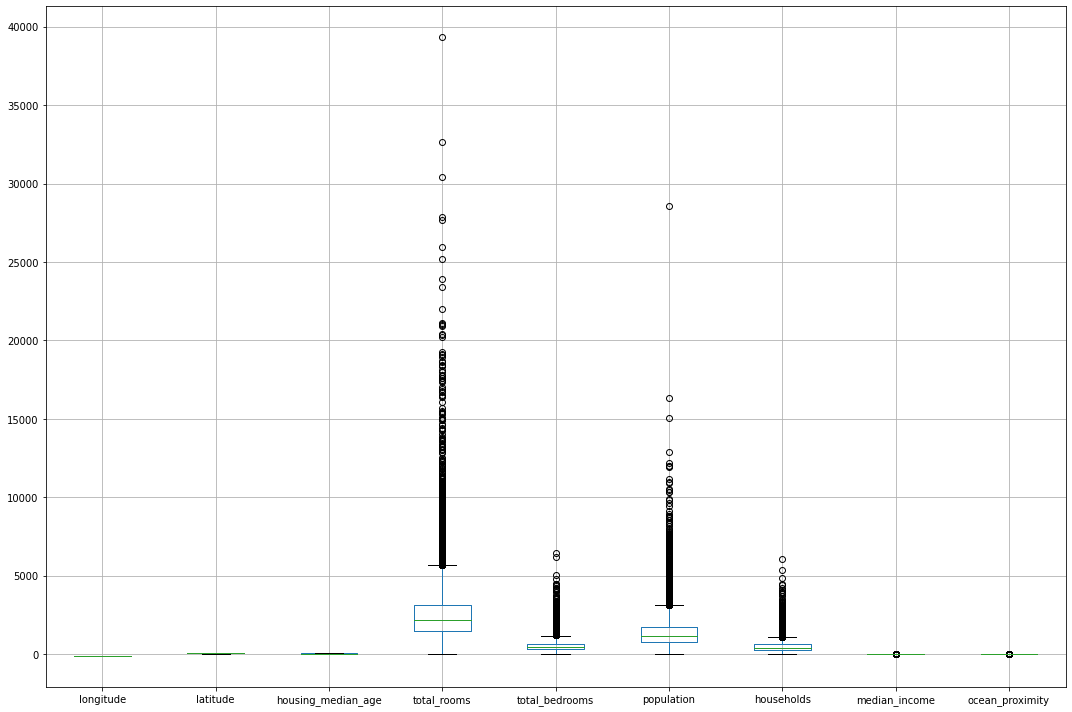

In [ ]:
td.boxplot(figsize=(15, 10))
plt.tight_layout()

**Here we can remove the outliers if we choose to do so.**

In [ ]:
#outlier_boundary = train_data.quantile(.75) + (train_data.quantile(.75) - train_data.quantile(.25)) * 1.5
#train_data = train_data[train_data <= outlier_boundary].dropna()

# **Comparing base models**

Here we plot the distribution of the root mean squared errors for our potential base models.

In [ ]:
from sklearn.model_selection import train_test_split

y = train_data['median_house_value']
X = train_data.drop(['id', 'median_house_value'], axis=1)


**This function gets the loss distribution of a passed model for a given dataset.**

In [ ]:
def get_model_scores(X, y, model):

  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state=None)

  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred_val = model.predict(X_val)

  cv = KFold(n_splits=200, shuffle=True, random_state=5)
  train_scores = cross_val_score(model, X_train, y_train, scoring= 'neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  val_scores = cross_val_score(model, X_val, y_val, scoring= 'neg_root_mean_squared_error', cv=cv, n_jobs=-1)
  train_scores = np.absolute(train_scores)
  val_scores = np.absolute(val_scores)

  return pd.DataFrame(train_scores), pd.DataFrame(val_scores)

**Here we are creating our base models and calculating their loss distribution.**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score

# Creating our pipelines.
base_ols_pipe = make_pipeline(SimpleImputer(strategy='mean'), LinearRegression())
base_ridge_pipe = make_pipeline(SimpleImputer(strategy='mean'), Ridge())
base_elastic_pipe = make_pipeline(SimpleImputer(strategy='mean'), ElasticNet())
base_lasso_pipe = make_pipeline(SimpleImputer(strategy='mean'), Lasso())

# Grabbing our loss distributions.
base_ols_scores_train, base_ols_scores_val = get_model_scores(X, y, base_ols_pipe)
base_ridge_scores_train, base_ridge_scores_val = get_model_scores(X, y, base_ridge_pipe)
base_elastic_scores_train, base_elastic_scores_val = get_model_scores(X, y, base_elastic_pipe)
base_lasso_scores_train, base_lasso_scores_val = get_model_scores(X, y, base_lasso_pipe)

**Here we are generating the plots for our loss distributions.**

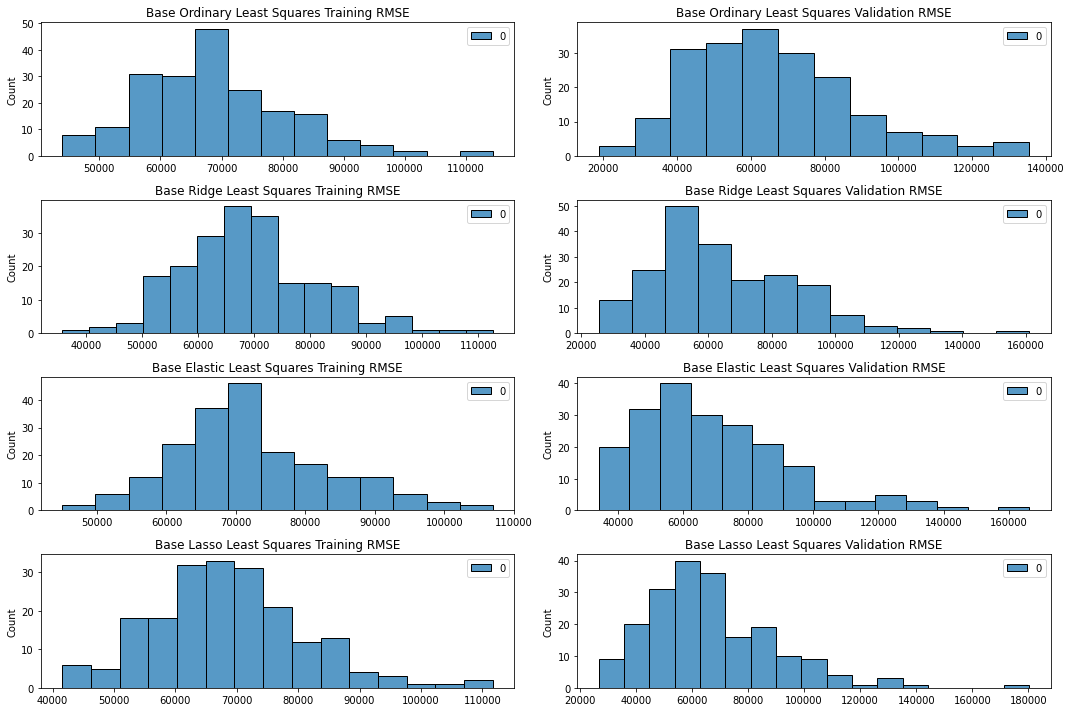

In [ ]:
# Ordinary Least Squares plots.
plots, axs = plt.subplots(4, 2, figsize=(15, 10))
axs[0,0].set_title('Base Ordinary Least Squares Training RMSE')
sns.histplot(data=base_ols_scores_train, ax=axs[0,0])
axs[0,1].set_title('Base Ordinary Least Squares Validation RMSE')
sns.histplot(data=base_ols_scores_val, ax=axs[0,1])

# Ridge Least Squares plots.
axs[1,0].set_title('Base Ridge Least Squares Training RMSE')
sns.histplot(data=base_ridge_scores_train, ax=axs[1,0])
axs[1,1].set_title('Base Ridge Least Squares Validation RMSE')
sns.histplot(data=base_ridge_scores_val, ax=axs[1,1])

# Elastic Least Squares plots.
axs[2,0].set_title('Base Elastic Least Squares Training RMSE')
sns.histplot(data=base_elastic_scores_train, ax=axs[2,0])
axs[2,1].set_title('Base Elastic Least Squares Validation RMSE')
sns.histplot(data=base_elastic_scores_val, ax=axs[2,1])

# Lasso Least Squares plots.
axs[3,0].set_title('Base Lasso Least Squares Training RMSE')
sns.histplot(data=base_lasso_scores_train, ax=axs[3,0])
axs[3,1].set_title('Base Lasso Least Squares Validation RMSE')
sns.histplot(data=base_lasso_scores_val, ax=axs[3,1])
plots.tight_layout()

We can tell from these plots that using a Ridge regression model would probably be the safest bet, with a ordinary least squares model coming in close second. Lasso appears to have more variance, while Ridge's loss values are the most consistent for the lowest error.

# **Creating our model and it's pipeline**

Here we create a pipeline for our RidgeCV Linear regression algorithm, and make a TransformedTargetRegressor object as a wrapper to apply a power transformation to make passed features more gaussian-like in distribution (when it is desirable for the model).

In [ ]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer

ridge_pipe = make_pipeline(SimpleImputer(strategy='mean'), 
                          PowerTransformer(), 
                          PCA(n_components=9),
                          Ridge())

model = TransformedTargetRegressor(regressor=ridge_pipe, 
                                   transformer=PowerTransformer())


# **Fitting and Training the model**

Here we train and fit the model we have chosen. I chose a 20/80 split in training data because it was the most consistent performing split for me. The others had a bit more variance.

In [ ]:
from statistics import median

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=4)
model.fit(X_train, y_train)
lr_training_pred = model.predict(X_train)
lr_val_pred = model.predict(X_val)

cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(model, X, y, scoring= 'neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)

print("Median Cross_Val_Score:");
print(median(scores))

print(); print("Mean of Cross_Val_Scores:")
print(np.mean(scores))

print(); print("Training Error:");
print(np.sqrt(mean_squared_error(y_train, lr_training_pred)))

print(); print("Validation Error:")
print(np.sqrt(mean_squared_error(y_val, lr_val_pred)))

Median Cross_Val_Score:
69016.22329890914

Mean of Cross_Val_Scores:
69564.51726711565

Training Error:
67585.81265045208

Validation Error:
65130.67610488537


# **Output**

Generates and saves our test data's predictions to a CSV file named 'my_submission.csv'

In [ ]:
X_test = test_data.drop(['id'], axis=1)

test_pred = model.predict(X_test)

output = pd.DataFrame({'id': test_data.id, 'median_house_value': test_pred.astype(int)})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
output

Your submission was successfully saved!


,id,median_house_value
0,2814,167541
1,6277,136442
2,2625,164855
3,3362,85478
4,8391,186431
...,...,...
10315,9753,320082
10316,1546,272878
10317,2766,51358
10318,2784,134981
